In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
data = pd.read_csv("ToyotaCorolla.csv",encoding = 'latin2')
data

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
#pick only these columns("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")
t1= toy[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
t1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
t1 = t1.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"}, axis = 1)
t1

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
t1.head(11)

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [10]:
t1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [11]:
t1.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [12]:
t1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


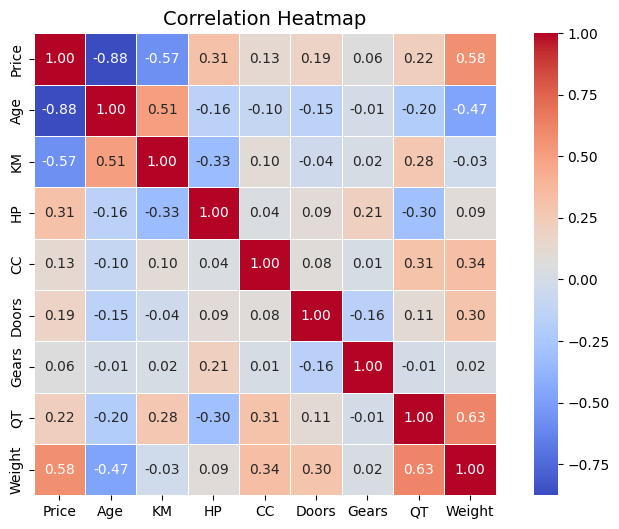

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr = t1.corr()

# Set figure size
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(
    corr, 
    annot=True,       # Show correlation values on the cells
    cmap='coolwarm',  # Color palette
    fmt='.2f',        # Format of correlation values
    linewidths=0.5,   # Space between cells
    square=True       # Keep boxes square-shaped
)

# Title
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


In [13]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [14]:
t1.isnull()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1431,False,False,False,False,False,False,False,False,False
1432,False,False,False,False,False,False,False,False,False
1433,False,False,False,False,False,False,False,False,False
1434,False,False,False,False,False,False,False,False,False


In [15]:
t1[t1.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
t2 = t1.drop_duplicates().reset_index(drop=True)
t2


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [18]:
import statsmodels.formula.api as smf

In [20]:
model = smf.ols("Price~Age+KM+Weight+HP+CC+Gears+QT+Doors", data = t2).fit()
model

In [21]:
# Finding rsquared values
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        17:38:40   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
## checking(finding) R-square and Adjusted R-square

model.rsquared, model.rsquared_adj

(np.float64(0.8625200256946999), np.float64(0.8617487495415145))

In [23]:
## checking(finding) t-values and p-values

model.tvalues, model.pvalues

(Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 Weight       15.760663
 HP           11.209719
 CC           -1.316436
 Gears         3.034563
 QT            2.944198
 Doors        -0.023012
 dtype: float64,
 Intercept     1.113392e-04
 Age          1.879217e-288
 KM            1.994713e-56
 Weight        1.031118e-51
 HP            5.211155e-28
 CC            1.882393e-01
 Gears         2.452430e-03
 QT            3.290363e-03
 Doors         9.816443e-01
 dtype: float64)

In [25]:
slr_c = smf.ols('Price~CC',data=t2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [27]:
slr_c=smf.ols('Price~Doors',data=t2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [29]:
slr_c=smf.ols('Price~CC+Doors',data=t2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [30]:
slr_c=smf.ols('Price~CC+Doors',data=t2).fit()
slr_c.tvalues , slr_c.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)